# Problem Statement

##### This is the data of a Real Estate company where they are trying to find Property Price evaluations as per the location and needs to develop a predictive machine learning model

In [608]:
#important libraries
#importing the necessary packages
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.style
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [609]:
BHD1=pd.read_csv(r'D:\Learnbay\Project\Bengaluru_House\Bengaluru_House_Data.csv', sep=',', encoding='ISO-8859-1')
BHD1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [610]:
#let's get in to the data information with datatypes
BHD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


# Data Dictionary

### Area_Type:   The Type of Area of Property
### Availability: Earliest time to move in the property, availability for possession.
### Location: Locality or Area in the city
### Size: Property Type (Like 3BHK, 4BHK)
### Society: The property in the society or not
### Total Sqft area: Area of property
### Bathroom Nos: No of Bathroom in that particular Property
### Balcony: No of Balcony
### Price: Price of the property (target Column)


# Data Pre Processing Exploratory Data Analysis :

In [611]:
#Data Structure
BHD1.shape

(13320, 9)

In [676]:
def extract_sqft(x):
    tokens = x.split(" - ")
    result = 0
    if len(tokens) > 1:
        result = (float(tokens[0]) + float(tokens[1]))/2
        return result
    else:
        try:
            result = float(x)
        except:
            temp = re.search("[0-9][A-Z]", tokens[0])
            if (tokens[0][temp.start() + 1:] == "Sq. Meter"):
                result = 10.764 * float(tokens[0][:temp.start() + 1])
            elif (tokens[0][temp.start() + 1:] == "Perch"):
                result = 368.007 * float(tokens[0][:temp.start() + 1])
            elif (tokens[0][temp.start() + 1:] == "Sq. Yards"):
                result = 9 * float(tokens[0][:temp.start() + 1])
            elif (tokens[0][temp.start() + 1:] == "Acres"):
                result = 43560 * float(tokens[0][:temp.start() + 1])
            elif (tokens[0][temp.start() + 1:] == "Guntha"):
                result = 1089 * float(tokens[0][:temp.start() + 1])
            elif (tokens[0][temp.start() + 1:] == "Grounds"):
                result = 2400.35 * float(tokens[0][:temp.start() + 1])
    return result

In [677]:
BHD2 = BHD1.copy()
BHD2["total_sqft"] = BHD2['total_sqft'].apply(extract_sqft)
BHD2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,$51.00


In [614]:
BHD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [615]:
# To extract the numeric value from the given value
import re

def extract_price(string):
    result = re.findall(r'\d+\.\d+|\d+', string)
    if result:
        return float(result[0])
    else:
        return None

In [616]:
BHD3 = BHD2.copy()
BHD3["price"] = BHD2['price'].apply(extract_price)
BHD3.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [617]:
BHD3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [618]:
print(pd.DataFrame(BHD3['size'].unique()).to_string())

             0
0        2 BHK
1    4 Bedroom
2        3 BHK
3        4 BHK
4    6 Bedroom
5    3 Bedroom
6        1 BHK
7         1 RK
8    1 Bedroom
9    8 Bedroom
10   2 Bedroom
11   7 Bedroom
12       5 BHK
13       7 BHK
14       6 BHK
15   5 Bedroom
16      11 BHK
17       9 BHK
18         NaN
19   9 Bedroom
20      27 BHK
21  10 Bedroom
22  11 Bedroom
23      10 BHK
24      19 BHK
25      16 BHK
26  43 Bedroom
27      14 BHK
28       8 BHK
29  12 Bedroom
30      13 BHK
31  18 Bedroom


In [619]:
BHD3[BHD3['size'] == '43 Bedroom'].index

Int64Index([4684], dtype='int64')

In [620]:
BHD3.iloc[4684]

area_type          Plot  Area
availability    Ready To Move
location          Munnekollal
size               43 Bedroom
society                   NaN
total_sqft             2400.0
bath                     40.0
balcony                   0.0
price                   660.0
Name: 4684, dtype: object

### Observation: Though there is 43 bedroom mentioned but practically 43 bedroom with only 2400 sq ft plot area is impossible so we need to drop the row 

In [621]:
BHD3.drop([4684], axis=0, inplace=True)

In [622]:
print(pd.DataFrame(BHD3['size'].unique()).to_string())

             0
0        2 BHK
1    4 Bedroom
2        3 BHK
3        4 BHK
4    6 Bedroom
5    3 Bedroom
6        1 BHK
7         1 RK
8    1 Bedroom
9    8 Bedroom
10   2 Bedroom
11   7 Bedroom
12       5 BHK
13       7 BHK
14       6 BHK
15   5 Bedroom
16      11 BHK
17       9 BHK
18         NaN
19   9 Bedroom
20      27 BHK
21  10 Bedroom
22  11 Bedroom
23      10 BHK
24      19 BHK
25      16 BHK
26      14 BHK
27       8 BHK
28  12 Bedroom
29      13 BHK
30  18 Bedroom


In [623]:
# As it's a housing data so we are replacing all 'bedroom' with 'BHK'
BHD3['size'] = BHD3['size'].str.replace('Bedroom', 'BHK')
BHD3['size'] = BHD3['size'].str.replace('RK', 'BHK')

In [624]:
BHD3

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [625]:
#Lets check the null values
number_of_missing_values=BHD3.isna().sum().sort_values(ascending=True)
percentage_of_missing_values=((BHD3.isna().sum()/13320)*100).sort_values(ascending=True)
missing_data=pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total missing value', 'Percentage of Missing Values'])    
missing_data

,Total missing value,Percentage of Missing Values
area_type,0,0.000000
availability,0,0.000000
total_sqft,0,0.000000
price,0,0.000000
location,1,0.007508
size,16,0.120120
bath,73,0.548048
balcony,609,4.572072
society,5501,41.298799


#### Observation: We can clearly observe from the above cell there are missing value present in attributes(``Location`` , ``Size`` , ``Bath`` , ``Balcony`` , ``Society``) out of which socity have the highest amount of missing value i.e. apprroximately 40%

In [626]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=BHD3.select_dtypes(object)
df_numerical=BHD3.select_dtypes(include=np.number)

In [627]:
print("The number of categorical columns is: ",len(df_categorical.columns))
print(list(df_categorical.columns))

The number of categorical columns is:  5
['area_type', 'availability', 'location', 'size', 'society']


In [628]:
print("The number of numerical columns is: ",len(df_numerical.columns))
print(list(df_numerical.columns))

The number of numerical columns is:  4
['total_sqft', 'bath', 'balcony', 'price']


# Univariate Analysis :

### Analyse categorical columns :

In [629]:
categorical_columns

Index(['area_type', 'availability', 'location', 'size', 'society'], dtype='object')

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

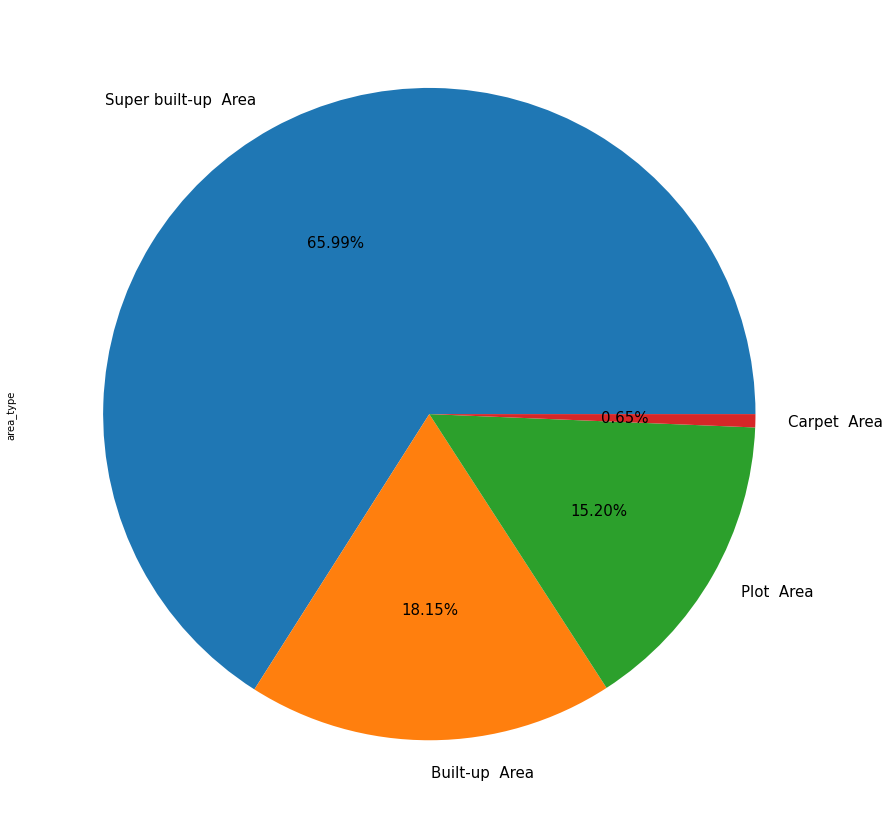

In [630]:
#univariate analysis of area_type
print(BHD1["area_type"].value_counts())
BHD1["area_type"].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

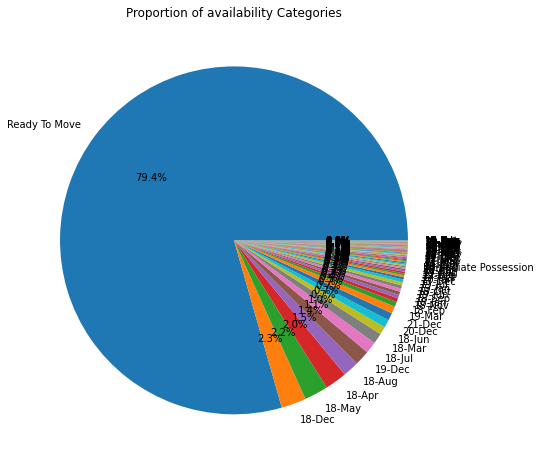

Mode: Ready To Move
Proportions:
 Ready To Move    0.794354
18-Dec           0.023050
18-May           0.022149
18-Apr           0.020347
18-Aug           0.015016
                   ...   
15-Aug           0.000075
17-Jan           0.000075
16-Nov           0.000075
16-Jan           0.000075
14-Jul           0.000075
Name: availability, Length: 81, dtype: float64
Percentages:
 Ready To Move    79.435393
18-Dec            2.304978
18-May            2.214881
18-Apr            2.034687
18-Aug            1.501614
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: availability, Length: 81, dtype: float64
Number of unique categories: 81
Number of missing values: 0
Categories with low frequencies: ['20-Nov', '16-Dec', '20-Apr', '20-May', '21-Nov', '16-Mar', '22-Mar', '19-Feb', '20-Mar', '22-Nov', '16-Sep', '15-Oct', '17-Feb', '15-Nov', '20-Feb', '15-Jun', '16-Jul', '14-Nov', '

In [631]:
# Frequency distribution of availability category
frequency = BHD3['availability'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Proportion of availability Categories')
plt.show()

# Mode
mode = BHD3['availability'].mode()[0]
print("Mode:", mode)

# Proportions and percentages
proportions = frequency / frequency.sum()
percentages = proportions * 100
print("Proportions:\n", proportions)
print("Percentages:\n", percentages)

# Summary statistics
unique_categories = BHD3['availability'].nunique()
missing_values = BHD3['availability'].isnull().sum()
low_frequency_categories = frequency[frequency < 5].index.tolist()
print("Number of unique categories:", unique_categories)
print("Number of missing values:", missing_values)
print("Categories with low frequencies:", low_frequency_categories)

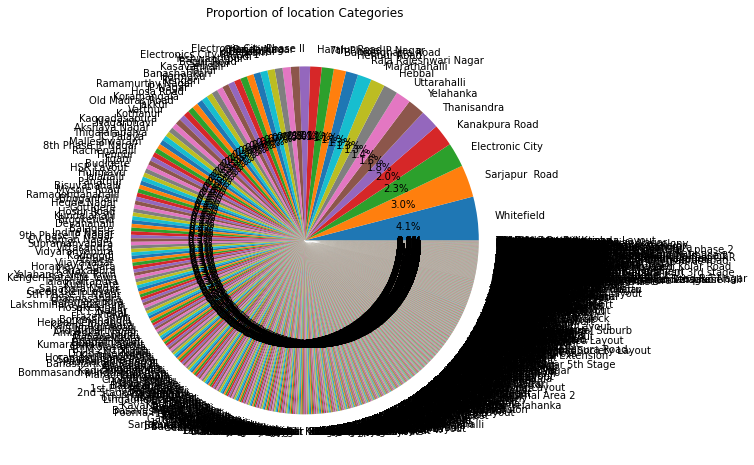

Mode: Whitefield
location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64
Proportions:
 Whitefield                        0.040547
Sarjapur  Road                    0.029959
Electronic City                   0.022676
Kanakpura Road                    0.020499
Thanisandra                       0.017570
                                    ...   
Bapuji Layout                     0.000075
1st Stage Radha Krishna Layout    0.000075
BEML Layout 5th stage             0.000075
singapura paradise                0.000075
Abshot Layout                     0.000075
Name: location, Length: 1305, dtype: float64
Percentages:
 Whitefield                        4.054663
Sarjapur  Road                    2.995945
El

In [670]:
# Frequency distribution of location category
frequency = BHD3['location'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Proportion of location Categories')
plt.show()

# Mode 
mode = BHD3['location'].mode()[0]
print("Mode:", mode)

# Count location category
locationStats = BHD3.groupby("location")["location"].agg('count').sort_values(ascending = False)
print(locationStats)

# Proportions and percentages
proportions = frequency / frequency.sum()
percentages = proportions * 100
print("Proportions:\n", proportions)
print("Percentages:\n", percentages)

# Summary statistics
unique_categories = BHD3['location'].nunique()

missing_values = BHD3['location'].isnull().sum()
low_frequency_categories = frequency[frequency < 5].index.tolist()
print("Number of unique categories:", unique_categories)
print("Number of missing values:", missing_values)
print("Categories with low frequencies:", low_frequency_categories)

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

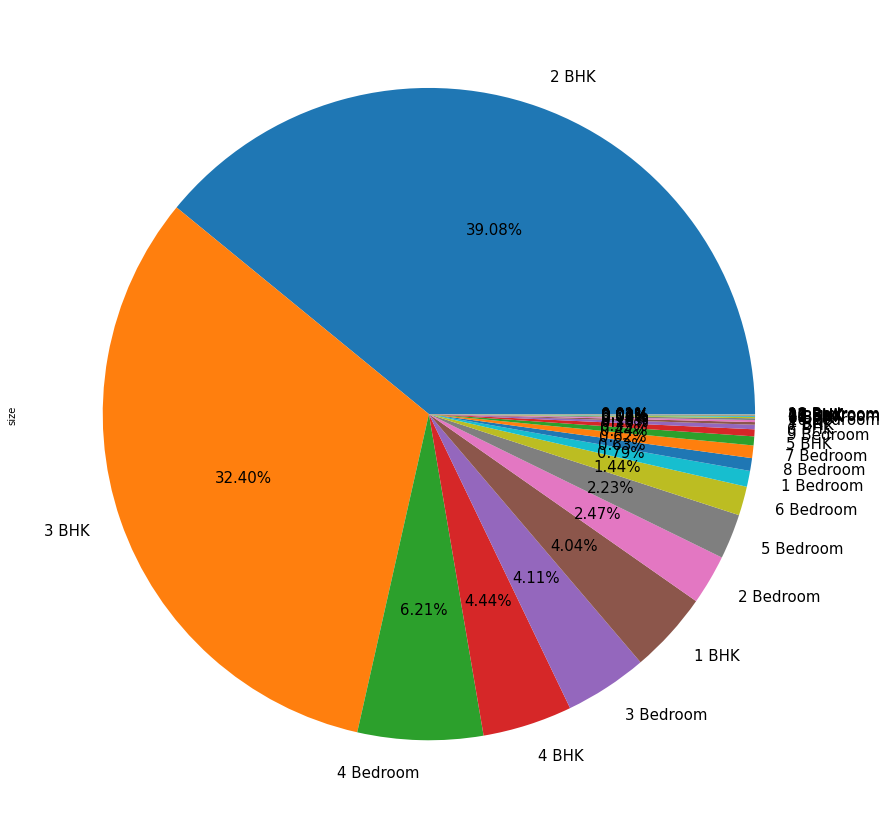

In [633]:
#univariate analysis of size
print(BHD1["size"].value_counts())
BHD1["size"].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

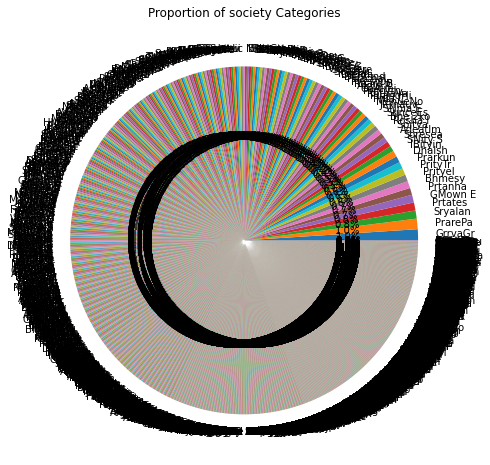

Mode: GrrvaGr
society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
BhisePa     1
Bhiya N     1
PrpiaSr     1
Bhmesa      1
Elley B     1
Name: society, Length: 2688, dtype: int64
Proportions:
 GrrvaGr    0.010233
PrarePa    0.009721
Sryalan    0.007547
Prtates    0.007547
GMown E    0.007163
             ...   
Amionce    0.000128
JaghtDe    0.000128
Jauraht    0.000128
Brity U    0.000128
RSntsAp    0.000128
Name: society, Length: 2688, dtype: float64
Percentages:
 GrrvaGr    1.023280
PrarePa    0.972116
Sryalan    0.754669
Prtates    0.754669
GMown E    0.716296
             ...   
Amionce    0.012791
JaghtDe    0.012791
Jauraht    0.012791
Brity U    0.012791
RSntsAp    0.012791
Name: society, Length: 2688, dtype: float64
Number of unique categories: 2688
Number of missing values: 5501
Categories with low frequencies: ['Vaens G', 'Velas V', 'Unateit', 'DSillto', 'CoiewSy', 'Saersel', 'Paestol', 'NCaveun', 'Pumesim', 'Vaarech', 'ARipsul', 'Moity

In [671]:
# Frequency distribution of society category
frequency = BHD3['society'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Proportion of society Categories')
plt.show()

# Mode
mode = BHD3['society'].mode()[0]
print("Mode:", mode)

# Count location category
societyStats = BHD3.groupby("society")["society"].agg('count').sort_values(ascending = False)
print(societyStats)

# Proportions and percentages
proportions = frequency / frequency.sum()
percentages = proportions * 100
print("Proportions:\n", proportions)
print("Percentages:\n", percentages)

# Summary statistics
unique_categories = BHD3['society'].nunique()
missing_values = BHD3['society'].isnull().sum()
low_frequency_categories = frequency[frequency < 5].index.tolist()
print("Number of unique categories:", unique_categories)
print("Number of missing values:", missing_values)
print("Categories with low frequencies:", low_frequency_categories)

In [635]:
df_numerical.columns

Index(['total_sqft', 'bath', 'balcony', 'price'], dtype='object')

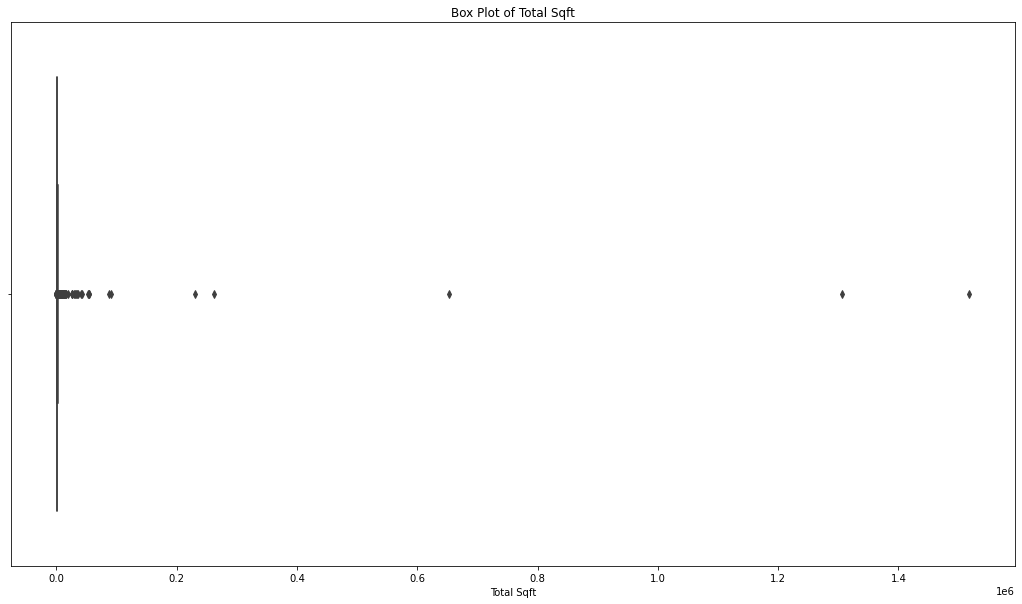

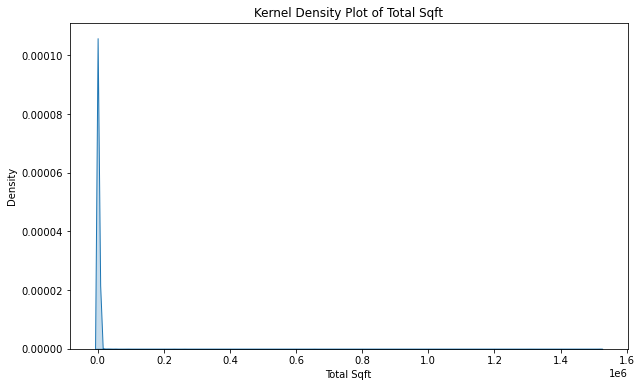

In [826]:
from scipy import stats

# Box plot
plt.figure(figsize=(18, 10))
sns.boxplot(BHD3['total_sqft'])
plt.xlabel('Total Sqft')
plt.title('Box Plot of Total Sqft')
plt.show()

# Kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(BHD3['total_sqft'], shade=True)
plt.xlabel('Total Sqft')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Total Sqft')
plt.show()


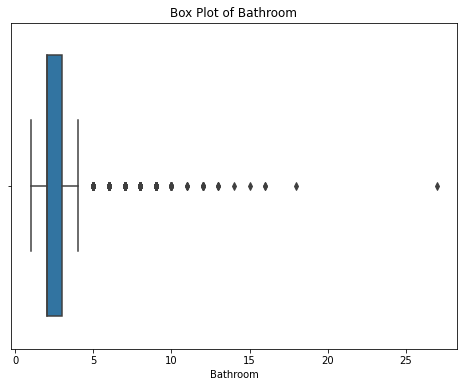

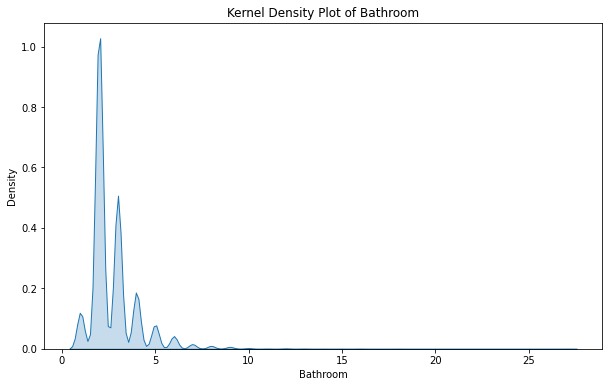

In [637]:
from scipy import stats

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(BHD3['bath'])
plt.xlabel('Bathroom')
plt.title('Box Plot of Bathroom')
plt.show()

# Kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(BHD3['bath'], shade=True)
plt.xlabel('Bathroom')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Bathroom')
plt.show()


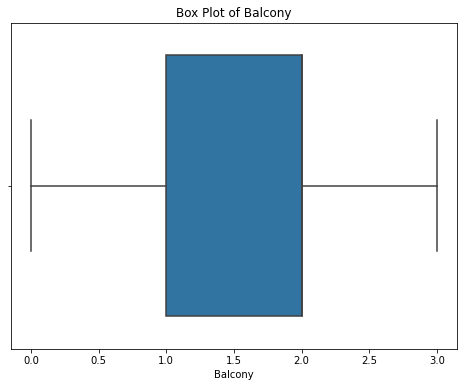

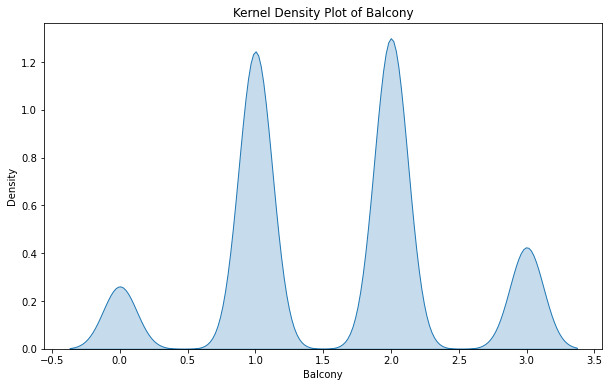

In [638]:
from scipy import stats

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(BHD3['balcony'])
plt.xlabel('Balcony')
plt.title('Box Plot of Balcony')
plt.show()

# Kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(BHD3['balcony'], shade=True)
plt.xlabel('Balcony')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Balcony')
plt.show()



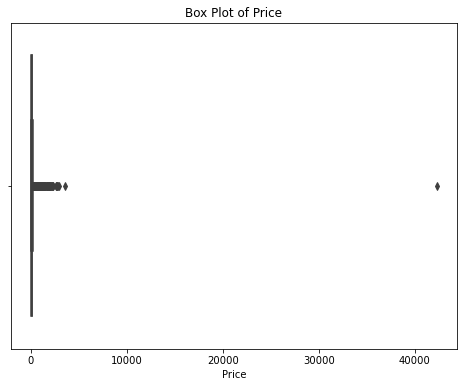

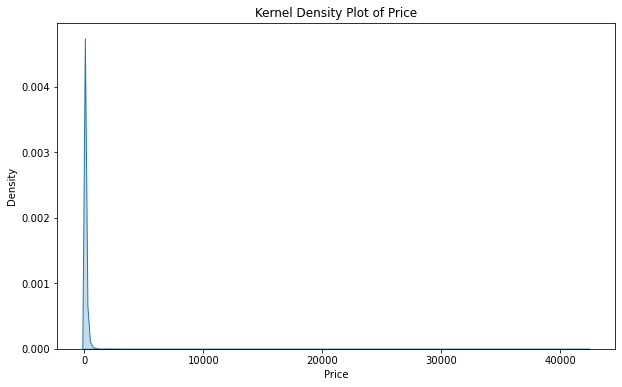

In [639]:
from scipy import stats

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(BHD3['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

# Kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(BHD3['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.show()


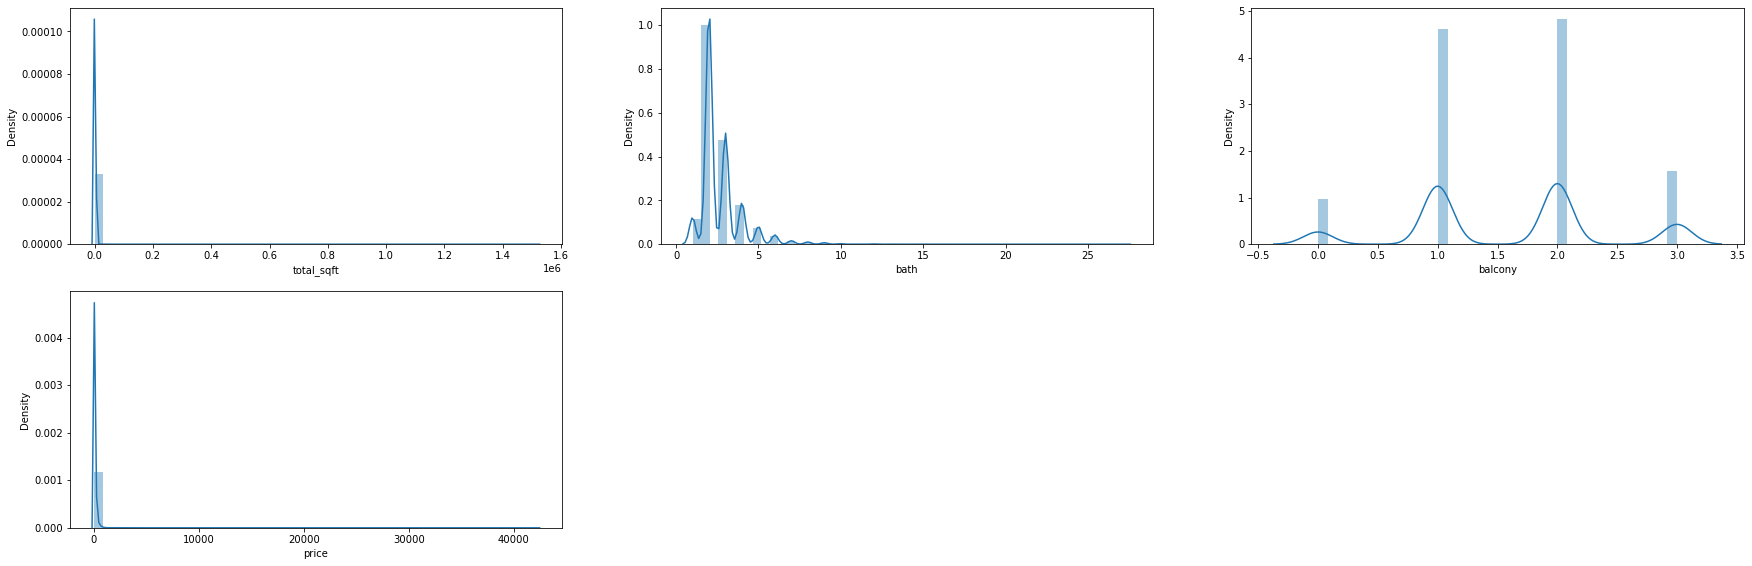

In [640]:
numerical_columns=df_numerical.columns
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(BHD3[p])
    s+=1

In [643]:
#Summerization of the numerical column
BHD3.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13319.0,1892.061667,18570.459967,0.0,1100.0,1277.0,1680.0,1518028.875
bath,13246.0,2.689793,1.301750,1.0,2.0,2.0,3.0,27.000
balcony,12710.0,1.584500,0.817175,0.0,1.0,2.0,2.0,3.000
price,13319.0,115.622581,394.460442,8.0,50.0,72.0,120.0,42278.000


### Observation: In the above table we can see that maximum value of total_sqft, bath and price is quite high and the mean value is also greater than the median, this indicates that there may be some outliers in the above data.

## Outlier detection and removal

In [644]:
BHD4=BHD3.copy()

In [645]:
#To find the outlier value for total_sqft
Q1 = BHD3['total_sqft'].quantile(0.25)
Q3 = BHD3['total_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers and their row numbers
outliers = BHD3[(BHD3['total_sqft'] < lower_bound) | (BHD3['total_sqft'] > upper_bound)]
outlier_values = outliers['total_sqft']
outlier_row_numbers = outliers.index

# Display the outlier values and row numbers
print("Outliers:")
for value, row_number in zip(outlier_values, outlier_row_numbers):
    print("Value:", value, "Row Number:", row_number)

len(outliers)

Outliers:
Value: 2600.0 Row Number: 1
Value: 2732.0 Row Number: 6
Value: 3300.0 Row Number: 7
Value: 2785.0 Row Number: 11
Value: 2770.0 Row Number: 18
Value: 2800.0 Row Number: 22
Value: 3210.0 Row Number: 56
Value: 4395.0 Row Number: 60
Value: 5700.0 Row Number: 62
Value: 3000.0 Row Number: 64
Value: 4400.0 Row Number: 79
Value: 3203.5 Row Number: 81
Value: 3000.0 Row Number: 85
Value: 2894.0 Row Number: 96
Value: 3700.0 Row Number: 114
Value: 5611.5 Row Number: 122
Value: 2650.0 Row Number: 123
Value: 5000.0 Row Number: 140
Value: 3050.0 Row Number: 141
Value: 4000.0 Row Number: 145
Value: 2795.0 Row Number: 153
Value: 3750.0 Row Number: 159
Value: 4200.0 Row Number: 163
Value: 2850.0 Row Number: 210
Value: 3600.0 Row Number: 216
Value: 3500.0 Row Number: 238
Value: 2600.0 Row Number: 241
Value: 4050.0 Row Number: 248
Value: 3045.0 Row Number: 259
Value: 2900.0 Row Number: 260
Value: 4111.0 Row Number: 277
Value: 2650.0 Row Number: 332
Value: 3122.0 Row Number: 337
Value: 11.0 Row N

Value: 3259.0 Row Number: 3568
Value: 2720.0 Row Number: 3586
Value: 3200.0 Row Number: 3588
Value: 4200.0 Row Number: 3596
Value: 3185.0 Row Number: 3598
Value: 4000.0 Row Number: 3606
Value: 10000.0 Row Number: 3609
Value: 3122.0 Row Number: 3613
Value: 3126.0 Row Number: 3630
Value: 4428.0 Row Number: 3636
Value: 3500.0 Row Number: 3638
Value: 2912.0 Row Number: 3641
Value: 2700.0 Row Number: 3646
Value: 3500.0 Row Number: 3662
Value: 4800.0 Row Number: 3673
Value: 2700.0 Row Number: 3689
Value: 4025.0 Row Number: 3697
Value: 3227.0 Row Number: 3704
Value: 2940.0 Row Number: 3714
Value: 2600.0 Row Number: 3727
Value: 3785.0 Row Number: 3736
Value: 3500.0 Row Number: 3737
Value: 2760.0 Row Number: 3751
Value: 4000.0 Row Number: 3753
Value: 2900.0 Row Number: 3778
Value: 2990.0 Row Number: 3810
Value: 3800.0 Row Number: 3811
Value: 3262.0 Row Number: 3838
Value: 4500.0 Row Number: 3841
Value: 2690.0 Row Number: 3861
Value: 4303.5 Row Number: 3862
Value: 3000.0 Row Number: 3870
Value: 

Value: 2780.0 Row Number: 7880
Value: 5200.0 Row Number: 7894
Value: 4000.0 Row Number: 7895
Value: 2800.0 Row Number: 7934
Value: 4000.0 Row Number: 7942
Value: 20000.0 Row Number: 7947
Value: 2600.0 Row Number: 7952
Value: 2650.0 Row Number: 7955
Value: 2600.0 Row Number: 7961
Value: 3854.5 Row Number: 7962
Value: 6830.0 Row Number: 7972
Value: 6000.0 Row Number: 7979
Value: 3600.0 Row Number: 7980
Value: 3692.0 Row Number: 7984
Value: 4408.0 Row Number: 8002
Value: 7800.0 Row Number: 8004
Value: 3500.0 Row Number: 8016
Value: 3181.0 Row Number: 8020
Value: 4920.0 Row Number: 8023
Value: 3060.0 Row Number: 8025
Value: 3000.0 Row Number: 8030
Value: 2666.0 Row Number: 8039
Value: 3600.0 Row Number: 8050
Value: 3200.0 Row Number: 8057
Value: 3633.0 Row Number: 8075
Value: 3978.0 Row Number: 8089
Value: 3621.0 Row Number: 8097
Value: 2800.0 Row Number: 8119
Value: 3205.0 Row Number: 8127
Value: 2700.0 Row Number: 8138
Value: 3033.0 Row Number: 8142
Value: 11000.0 Row Number: 8165
Value:

Value: 2700.0 Row Number: 11878
Value: 2800.0 Row Number: 11901
Value: 2750.0 Row Number: 11906
Value: 5100.0 Row Number: 11908
Value: 5667.5 Row Number: 11921
Value: 3500.0 Row Number: 11924
Value: 3150.0 Row Number: 11926
Value: 6729.0 Row Number: 11950
Value: 2710.0 Row Number: 11970
Value: 3200.0 Row Number: 11981
Value: 5400.0 Row Number: 11988
Value: 2615.0 Row Number: 12049
Value: 3250.0 Row Number: 12058
Value: 3500.0 Row Number: 12059
Value: 2999.97 Row Number: 12068
Value: 2880.0 Row Number: 12087
Value: 3554.0 Row Number: 12092
Value: 4250.0 Row Number: 12102
Value: 3671.0 Row Number: 12104
Value: 3633.0 Row Number: 12114
Value: 2955.0 Row Number: 12151
Value: 3000.0 Row Number: 12164
Value: 3122.0 Row Number: 12192
Value: 3729.0 Row Number: 12210
Value: 5515.0 Row Number: 12230
Value: 3000.0 Row Number: 12269
Value: 2858.0 Row Number: 12280
Value: 3000.0 Row Number: 12332
Value: 3750.0 Row Number: 12347
Value: 2700.0 Row Number: 12352
Value: 5480.0 Row Number: 12353
Value: 

1194

In [646]:
BHD4 = BHD4.drop(outliers.index)

In [647]:
#To find the outlier value for bath
Q1 = BHD4['bath'].quantile(0.25)
Q3 = BHD4['bath'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers and their row numbers
outliers = BHD4[(BHD4['bath'] < lower_bound) | (BHD4['bath'] > upper_bound)]
outlier_values = outliers['bath']
outlier_row_numbers = outliers.index

# Display the outlier values and row numbers
print("Outliers:")
for value, row_number in zip(outlier_values, outlier_row_numbers):
    print("Value:", value, "Row Number:", row_number)

len(outliers)

Outliers:
Value: 6.0 Row Number: 9
Value: 9.0 Row Number: 45
Value: 7.0 Row Number: 68
Value: 5.0 Row Number: 84
Value: 6.0 Row Number: 89
Value: 7.0 Row Number: 129
Value: 5.0 Row Number: 149
Value: 6.0 Row Number: 170
Value: 5.0 Row Number: 192
Value: 7.0 Row Number: 193
Value: 6.0 Row Number: 209
Value: 5.0 Row Number: 258
Value: 6.0 Row Number: 282
Value: 5.0 Row Number: 315
Value: 5.0 Row Number: 370
Value: 7.0 Row Number: 413
Value: 5.0 Row Number: 425
Value: 8.0 Row Number: 434
Value: 5.0 Row Number: 483
Value: 6.0 Row Number: 554
Value: 5.0 Row Number: 610
Value: 5.0 Row Number: 615
Value: 5.0 Row Number: 639
Value: 7.0 Row Number: 677
Value: 5.0 Row Number: 679
Value: 9.0 Row Number: 770
Value: 7.0 Row Number: 783
Value: 6.0 Row Number: 838
Value: 6.0 Row Number: 885
Value: 5.0 Row Number: 935
Value: 11.0 Row Number: 938
Value: 6.0 Row Number: 991
Value: 7.0 Row Number: 1024
Value: 5.0 Row Number: 1033
Value: 10.0 Row Number: 1048
Value: 8.0 Row Number: 1068
Value: 5.0 Row Num

Value: 7.0 Row Number: 9211
Value: 6.0 Row Number: 9249
Value: 6.0 Row Number: 9275
Value: 6.0 Row Number: 9316
Value: 5.0 Row Number: 9480
Value: 8.0 Row Number: 9511
Value: 9.0 Row Number: 9517
Value: 5.0 Row Number: 9535
Value: 5.0 Row Number: 9551
Value: 5.0 Row Number: 9570
Value: 5.0 Row Number: 9633
Value: 6.0 Row Number: 9636
Value: 6.0 Row Number: 9640
Value: 5.0 Row Number: 9646
Value: 5.0 Row Number: 9652
Value: 5.0 Row Number: 9659
Value: 5.0 Row Number: 9686
Value: 5.0 Row Number: 9718
Value: 5.0 Row Number: 9796
Value: 7.0 Row Number: 9803
Value: 5.0 Row Number: 9805
Value: 5.0 Row Number: 9852
Value: 6.0 Row Number: 9860
Value: 6.0 Row Number: 9862
Value: 5.0 Row Number: 9887
Value: 5.0 Row Number: 9889
Value: 5.0 Row Number: 9892
Value: 6.0 Row Number: 9904
Value: 6.0 Row Number: 9909
Value: 5.0 Row Number: 9929
Value: 5.0 Row Number: 9954
Value: 6.0 Row Number: 9973
Value: 6.0 Row Number: 9974
Value: 9.0 Row Number: 9990
Value: 5.0 Row Number: 9991
Value: 5.0 Row Numbe

555

In [648]:
BHD5 = BHD4.copy()
BHD5 = BHD5.drop(outliers.index)

In [649]:
#To find the outlier value for balcony
Q1 = BHD3['balcony'].quantile(0.25)
Q3 = BHD3['balcony'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers and their row numbers
outliers = BHD3[(BHD3['balcony'] < lower_bound) | (BHD3['balcony'] > upper_bound)]
outlier_values = outliers['balcony']
outlier_row_numbers = outliers.index

# Display the outlier values and row numbers
print("Outliers:")
for value, row_number in zip(outlier_values, outlier_row_numbers):
    print("Value:", value, "Row Number:", row_number)

len(outliers)

Outliers:


0

#### Observation: No outliers in balcony

In [650]:
#To find the outlier value for price
Q1 = BHD5['price'].quantile(0.25)
Q3 = BHD5['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers and their row numbers
outliers = BHD5[(BHD5['price'] < lower_bound) | (BHD5['price'] > upper_bound)]
outlier_values = outliers['price']
outlier_row_numbers = outliers.index

# Display the outlier values and row numbers
print("Outliers:")
for value, row_number in zip(outlier_values, outlier_row_numbers):
    print("Value:", value, "Row Number:", row_number)

len(outliers)

Outliers:
Value: 186.0 Row Number: 30
Value: 185.0 Row Number: 57
Value: 205.0 Row Number: 77
Value: 229.0 Row Number: 107
Value: 200.0 Row Number: 121
Value: 210.0 Row Number: 133
Value: 175.0 Row Number: 164
Value: 300.0 Row Number: 185
Value: 260.0 Row Number: 225
Value: 185.0 Row Number: 249
Value: 415.0 Row Number: 324
Value: 400.0 Row Number: 325
Value: 215.0 Row Number: 334
Value: 365.0 Row Number: 355
Value: 230.0 Row Number: 362
Value: 275.0 Row Number: 373
Value: 175.0 Row Number: 403
Value: 410.0 Row Number: 407
Value: 240.0 Row Number: 435
Value: 252.0 Row Number: 451
Value: 200.0 Row Number: 453
Value: 220.0 Row Number: 469
Value: 230.0 Row Number: 472
Value: 260.0 Row Number: 480
Value: 180.0 Row Number: 481
Value: 245.0 Row Number: 534
Value: 175.0 Row Number: 559
Value: 300.0 Row Number: 566
Value: 225.0 Row Number: 573
Value: 313.0 Row Number: 583
Value: 180.0 Row Number: 584
Value: 262.0 Row Number: 649
Value: 200.0 Row Number: 663
Value: 200.0 Row Number: 666
Value: 

Value: 528.0 Row Number: 6051
Value: 250.0 Row Number: 6054
Value: 211.0 Row Number: 6080
Value: 175.0 Row Number: 6086
Value: 245.0 Row Number: 6089
Value: 200.0 Row Number: 6090
Value: 180.0 Row Number: 6111
Value: 179.0 Row Number: 6180
Value: 168.0 Row Number: 6185
Value: 250.0 Row Number: 6248
Value: 358.0 Row Number: 6271
Value: 225.0 Row Number: 6282
Value: 180.0 Row Number: 6367
Value: 260.0 Row Number: 6380
Value: 369.0 Row Number: 6453
Value: 450.0 Row Number: 6470
Value: 220.0 Row Number: 6473
Value: 310.0 Row Number: 6488
Value: 192.0 Row Number: 6555
Value: 220.0 Row Number: 6561
Value: 195.0 Row Number: 6593
Value: 300.0 Row Number: 6667
Value: 190.0 Row Number: 6686
Value: 170.0 Row Number: 6693
Value: 350.0 Row Number: 6695
Value: 180.0 Row Number: 6696
Value: 350.0 Row Number: 6741
Value: 184.0 Row Number: 6754
Value: 177.0 Row Number: 6762
Value: 270.0 Row Number: 6776
Value: 275.0 Row Number: 6828
Value: 180.0 Row Number: 6842
Value: 200.0 Row Number: 6926
Value: 337

Value: 170.0 Row Number: 12418
Value: 170.0 Row Number: 12423
Value: 275.0 Row Number: 12434
Value: 235.0 Row Number: 12439
Value: 700.0 Row Number: 12449
Value: 233.0 Row Number: 12451
Value: 240.0 Row Number: 12481
Value: 185.0 Row Number: 12491
Value: 295.0 Row Number: 12508
Value: 360.0 Row Number: 12515
Value: 235.0 Row Number: 12519
Value: 320.0 Row Number: 12555
Value: 300.0 Row Number: 12571
Value: 228.0 Row Number: 12588
Value: 395.0 Row Number: 12618
Value: 170.0 Row Number: 12638
Value: 500.0 Row Number: 12639
Value: 185.0 Row Number: 12644
Value: 345.0 Row Number: 12712
Value: 650.0 Row Number: 12726
Value: 170.0 Row Number: 12736
Value: 180.0 Row Number: 12743
Value: 650.0 Row Number: 12748
Value: 180.0 Row Number: 12758
Value: 172.0 Row Number: 12759
Value: 180.0 Row Number: 12790
Value: 300.0 Row Number: 12796
Value: 175.0 Row Number: 12799
Value: 225.0 Row Number: 12824
Value: 180.0 Row Number: 12839
Value: 183.0 Row Number: 12843
Value: 180.0 Row Number: 12914
Value: 1

753

In [651]:
BHD6 = BHD5.copy()
BHD6 = BHD6.drop(outliers.index)

In [652]:
BHD6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10817 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10817 non-null  object 
 1   availability  10817 non-null  object 
 2   location      10816 non-null  object 
 3   size          10805 non-null  object 
 4   society       6809 non-null   object 
 5   total_sqft    10817 non-null  float64
 6   bath          10772 non-null  float64
 7   balcony       10580 non-null  float64
 8   price         10817 non-null  float64
dtypes: float64(4), object(5)
memory usage: 845.1+ KB


In [653]:
BHD7=BHD6.copy()
BHD6.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,10817.0,1276.118325,365.900180,250.0,1070.0,1219.0,1491.0,2550.0
bath,10772.0,2.277943,0.658732,1.0,2.0,2.0,3.0,4.0
balcony,10580.0,1.544802,0.778635,0.0,1.0,2.0,2.0,3.0
price,10817.0,69.923619,32.192150,8.0,46.0,62.5,88.0,167.0


In [654]:
BHD6.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310.0,3.0,1.0,63.25
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800.0,2.0,2.0,70.00
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Shncyes,1000.0,2.0,1.0,38.00
13,Built-up Area,Ready To Move,Gottigere,2 BHK,NaN,1100.0,2.0,2.0,40.00
14,Plot Area,Ready To Move,Sarjapur,3 BHK,Skityer,2250.0,3.0,2.0,148.00


In [655]:
#Lets check the null values after removing outliers
number_of_missing_values=BHD6.isna().sum().sort_values(ascending=True)
percentage_of_missing_values=((BHD6.isna().sum()/10806)*100).sort_values(ascending=True)
missing_data=pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total missing value', 'Percentage of Missing Values'])    
missing_data

,Total missing value,Percentage of Missing Values
area_type,0,0.000000
availability,0,0.000000
total_sqft,0,0.000000
price,0,0.000000
location,1,0.009254
size,12,0.111049
bath,45,0.416435
balcony,237,2.193226
society,4008,37.090505


### Replacing null values with mode value

In [656]:
# Replacing null values with mode value for balcony
mode_value = stats.mode(BHD7['balcony']).mode[0]
BHD7['balcony'].fillna(mode_value, inplace=True)

In [657]:
# Replacing null values with mode value for location
mode_value = stats.mode(BHD7['location']).mode[0]
BHD7['location'].fillna(mode_value, inplace=True)

In [658]:
# Replacing null values with mode value for size
mode_value = stats.mode(BHD7['size']).mode[0]
BHD7['size'].fillna(mode_value, inplace=True)

In [659]:
# Replacing null values with mode value for bath
mode_value = stats.mode(BHD7['bath']).mode[0]
BHD7['bath'].fillna(mode_value, inplace=True)

In [660]:
# Replacing null values with mode value for size
mode_value = stats.mode(BHD7['society']).mode[0]
BHD7['society'].fillna(mode_value, inplace=True)

In [661]:
BHD7.isna().sum().sum()

0

In [662]:
BHD7.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,10817.0,1276.118325,365.900180,250.0,1070.0,1219.0,1491.0,2550.0
bath,10817.0,2.276787,0.657604,1.0,2.0,2.0,3.0,4.0
balcony,10817.0,1.532865,0.774177,0.0,1.0,2.0,2.0,3.0
price,10817.0,69.923619,32.192150,8.0,46.0,62.5,88.0,167.0


# Bivariate Analysis of the data

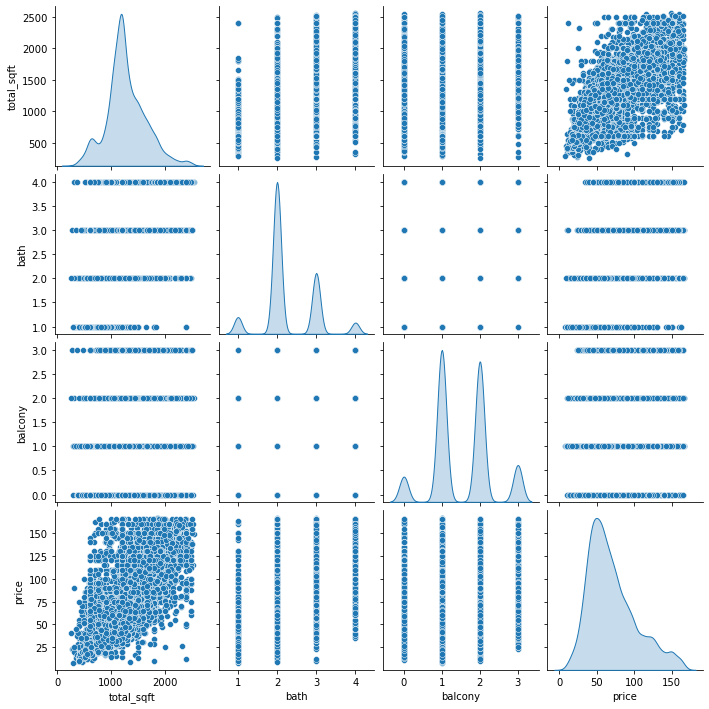

In [799]:
#starting with the pair plot
sns.pairplot(data=BHD7,diag_kind='kde')

In [815]:
# Finding the Variance Inflation Factor(only if >10)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = BHD7[['total_sqft', 'bath', 'balcony']]
X = sm.add_constant(X)
model = sm.OLS(BHD7['price'], X)
results = model.fit()
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable        VIF
0       const  16.578599
1  total_sqft   1.670179
2        bath   1.616576
3     balcony   1.119330


<AxesSubplot:>

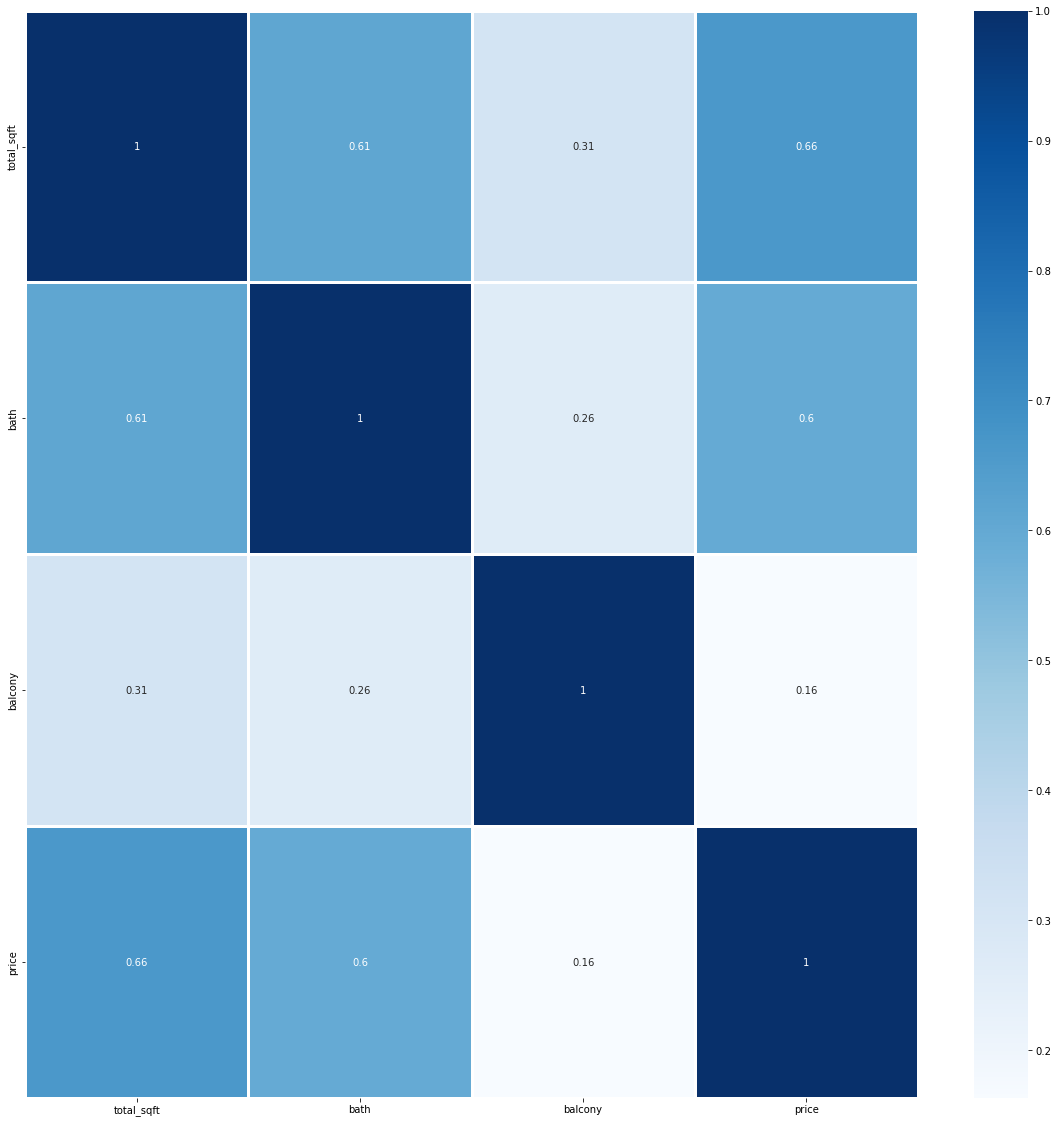

In [800]:
plt.figure(figsize=(20,20))
sns.heatmap(BHD7.corr(), annot=True, linewidth=2.5, linecolor='white',cmap='Blues')

In [821]:
# Result giving values more than 2 decimal
corr1=BHD7.corr()
corr1

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.613192,0.314331,0.660948
bath,0.613192,1.000000,0.262529,0.596458
balcony,0.314331,0.262529,1.000000,0.163221
price,0.660948,0.596458,0.163221,1.000000


## Feature Encoding

In [663]:
#We are using using One-Hot Encoding because Label Encoding is suitable for categorical data with inherent order or ranking
encoded_data = pd.get_dummies(BHD7, columns = df_categorical.columns)
encoded_data.head()

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,1056.0,2.0,1.0,39.07,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,1.0,38.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train and Test splitting

In [664]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = encoded_data.drop('price', axis=1) 
y = encoded_data['price']

# Split the dataset into training, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [682]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8653, 3576)
(2164, 3576)
(8653,)
(2164,)


## Model

### Linear Regression

In [773]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fitting the model on the training data
model1 = LinearRegression()
model1.fit(X_train, y_train)
score1 = model1.score(X_test, y_test)

# Making predictions on the test data
y_pred1 = model1.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred1)

### Decision Tree

In [774]:
from sklearn.tree import DecisionTreeRegressor

# Fitting the model on the training data
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
score2 = model2.score(X_test, y_test)

# Making predictions on the test data
y_pred2 = model2.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred2)

### Random Forest

In [775]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the model on the training data
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
score3 = model3.score(X_test, y_test)

# Making predictions on the test data
y_pred3 = model3.predict(X_test)

# Evaluate the model
mse3 = mean_squared_error(y_test, y_pred3)

### Lasso Regression

In [776]:
from sklearn.linear_model import Lasso

# Fitting the model on the training data
model4 = Lasso()
model4.fit(X_train, y_train)
score4 = model4.score(X_test, y_test)

# Making predictions on the test data
y_pred4 = model4.predict(X_test)

# Evaluate the model
mse4 = mean_squared_error(y_test, y_pred4)

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Fitting the model on the training data
model5 = Ridge()
model5.fit(X_train, y_train)
score5 = model5.score(X_test, y_test)

# Making predictions on the test data
y_pred5 = model5.predict(X_test)

# Evaluate the model
mse5 = mean_squared_error(y_test, y_pred5)

### Gradient Boosting Regression

In [778]:
from sklearn.ensemble import GradientBoostingRegressor

# Fitting the model on the training data
model6 = GradientBoostingRegressor()
model6.fit(X_train, y_train)
score6 = model6.score(X_test, y_test)

# Making predictions on the test data
y_pred6 = model6.predict(X_test)


# Evaluate the model
mse6 = mean_squared_error(y_test, y_pred6)

### Support Vector Regression

In [779]:
from sklearn.svm import SVR

# Fitting the model on the training data
model7 = SVR()
model7.fit(X_train, y_train)
score7 = model7.score(X_test, y_test)

# Making predictions on the test data
y_pred7 = model7.predict(X_test)

# Evaluate the model
mse7 = mean_squared_error(y_test, y_pred7)

In [780]:
data={"MODEL":["Linear Regression","Decision Tree","Random Forest","Lasso Regression","Ridge Regression","Gradient Boosting Regression"," Support Vector Regression"],"SCORE":[score1,score2,score3,score4,score5,score6,score7],"MEAN SQUARED ERROR":[mse1,mse2,mse3,mse4,mse5,mse6,mse7]}

In [781]:
pd.DataFrame(data)

,MODEL,SCORE,MEAN SQUARED ERROR
0,Linear Regression,0.742024,276.015307
1,Decision Tree,0.551556,479.801291
2,Random Forest,0.686151,335.795265
3,Lasso Regression,0.510899,523.301465
4,Ridge Regression,0.759797,256.998873
5,Gradient Boosting Regression,0.630760,395.058824
6,Support Vector Regression,0.412556,628.521543


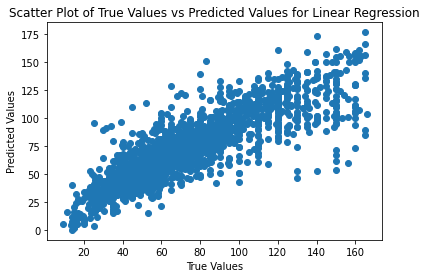

In [791]:
plt.scatter(y_test, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs Predicted Values for Linear Regression')
plt.show()

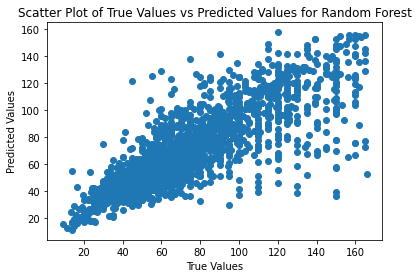

In [792]:
plt.scatter(y_test, y_pred3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs Predicted Values for Random Forest')
plt.show()

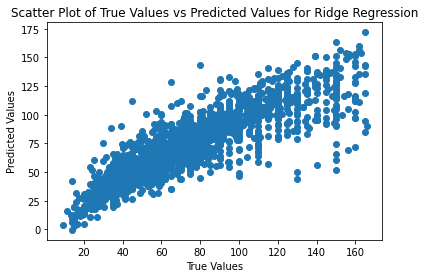

In [793]:
plt.scatter(y_test, y_pred5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs Predicted Values for Ridge Regression')
plt.show()

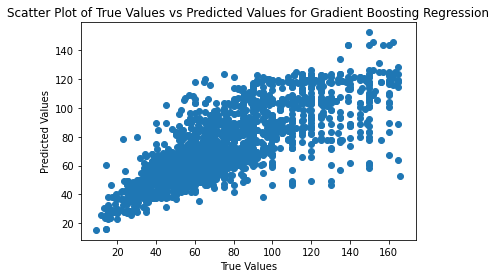

In [794]:
plt.scatter(y_test, y_pred6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs Predicted Values for Gradient Boosting Regression')
plt.show()

In [827]:
#Equation for the straight line of linear regression model
m = model1.coef_[0]
c = model1.intercept_

# Print the equation
print(f"y = {m:.2f}x + {c:.2f}")

y = 0.04x + 13.64
